In [9]:
%matplotlib inline
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

SEED = 35010732 # from random.org
np.random.seed(SEED)

print(plt.style.available)
plt.style.use('seaborn-white')

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [2]:
a = 1.
b = 0.1
c = 1.5
d = 0.75
def dX_dt(X, t=0):
    """ Return the growth rate of fox and rabbit populations. """
    return np.array([ a*X[0] -   b*X[0]*X[1] ,
                  -c*X[1] + d*b*X[0]*X[1] ])

In [12]:
t = np.linspace(0, 15,  100)              # time
X0 = np.array([10, 5])                     # initials conditions: 10 rabbits and 5 foxes
X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
infodict['message']                     # >>> 'Integration successful.'

'Integration successful.'

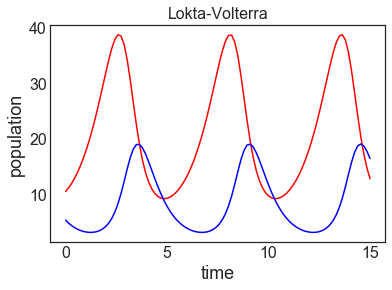

In [29]:
rabbits, foxes = X.T
f1 = plt.figure()
plt.plot(t, rabbits, 'r-', label='Rabbits')
plt.plot(t, foxes  , 'b-', label='Foxes')
#plt.grid()
#plt.legend(loc='best')
#plt.ylim((0,55))
plt.xlabel('time')
plt.ylabel('population')
plt.title('Lokta-Volterra')
f1.savefig('LV.png',format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

In [30]:
# add error.  Should be Poisson
rabbits_witherr = np.random.poisson(rabbits)
foxes_witherr = np.random.poisson(foxes)

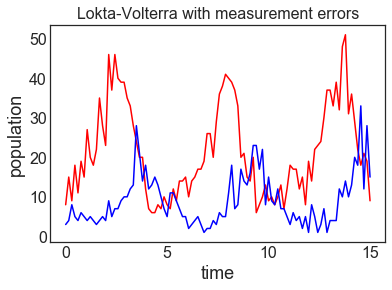

In [31]:
f2 = plt.figure()
plt.plot(t, rabbits_witherr, 'r-', label='Rabbits')
plt.plot(t, foxes_witherr  , 'b-', label='Foxes')
#plt.grid()
#plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('population')
plt.title('Lokta-Volterra with measurement errors')
f2.savefig('LVerror.png',format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")

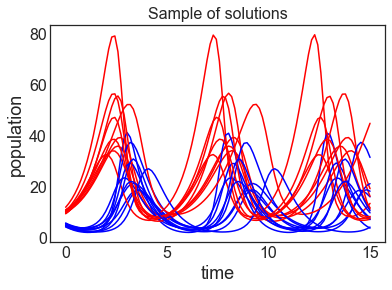

In [32]:
# lets produce different solutions with a spread of parameters
f3 = plt.figure()
for i in range(10):
    a = np.random.normal(loc=1,scale=0.1)
    b = np.random.normal(loc=0.1,scale=0.01)
    c = np.random.normal(loc=1.5,scale=0.15)
    d = np.random.normal(loc=0.75,scale=0.075)
    X0 = np.array([np.random.normal(loc=10,scale=1), np.random.normal(loc=5,scale=0.5)])
    X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
    rabbits, foxes = X.T
    plt.plot(t, rabbits,"r-")
    plt.plot(t, foxes,"b-")
plt.xlabel('time')
plt.ylabel('population')
plt.title('Sample of solutions')
f3.savefig('sample_solution.png',format='png',dpi=300,bbox_inches='tight',facecolor="white",backgroundcolor="white")